In [224]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

An elementary exothermic liquid phase reaction, where $A \rightarrow B$, takes place in two identical adiabatic CSTR's in series. Both reactors have a volume of $200~L$. Details on reaction kinetics and some operating parameters are summarized in the Table below:

<img src="2.4a.PNG" width="350" />

*The overall conversion of $A(X_{A})$ measured at the outlet of CSTR2 (based on the inlet to CSTR1) is only $30~\%$*

In [225]:
#Elementary
#liquid
#exothermic

In [226]:
Q    = 2.5 #L/s
CA1o = 0.1 #mol/L
T1o  = 450 #K
V1   = 200 #L
V2   = V1
ko   = 8000 #1/s
Ea   = 60000 #J/mol
CpA  = 100 #J/(mol.K)
CpB  = CpA
R    = 8.314
Xt   = 0.3

<img src="2.4b.JPG" width="650" />

Rate equations:
\begin{align}
r_{A_{1}} &= -k_{1}C_{A1_{0}}(1 - X_{1}) \nonumber \\
r_{A_{2}} &= -k_{2}C_{A2_{0}}(1 - X_{2}) \nonumber \\
k_{1} &= k_{0}e^{-E_{a}/RT} \nonumber \\
k_{2} &= k_{0}e^{-E_{a}/RT} \nonumber \\
r_{B_{1}} &= -r_{A_{1}} \nonumber \\
r_{B_{2}} &= -r_{A_{2}} \nonumber
\end{align}

Mass balance equations:
\begin{align}
F_{A1_{0}} - F_{A_{1}} + r_{A_{1}}V_{1} &= 0 \nonumber \\
F_{A1_{0}}X_{1} + r_{A_{1}}V_{1} &= 0 \nonumber \\
r_{A_{1}} &= \dfrac{-F_{A1_{0}}X_{1}}{V_{1}} \nonumber \\
-k_{0}e^{-E_{a}/RT_{1}}C_{A1_{0}}(1 - X_{1}) &= \dfrac{-C_{A1_{0}}QX_{1}}{V_{1}} \nonumber \\
X_{1} &= \dfrac{1}{Q} V_{1}k_{0}e^{-E_{a}/RT_{1}}(1 - X_{1})\nonumber \\
X_{2} &= \dfrac{1}{Q} V_{2}k_{0}e^{-E_{a}/RT_{2}}(1 - X_{2})\nonumber
\end{align}

\begin{align}
V_{1} &= V_{2} \nonumber
\end{align}

Energy Balance:
\begin{align}
T &= T_{0} + \dfrac{(-\Delta H_{RX_{j}})(F_{A_{0}}/a)}{\Sigma_{i}C_{p_{i}}}X_{A} \nonumber \\
T_{1} &= T_{0} + \dfrac{(-\Delta H_{RX1})}{C_{p_{A}}}X_{1} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX2})F_{A2_{0}}}{F_{A2_{0}}C_{p_{A}} + F_{B2_{0}}C_{p_{B}}}X_{2} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX2})F_{A1_{0}}(1 - X_{1})}{F_{A1_{0}}(1 - X_{1})C_{p_{A}} + F_{A1_{0}}X_{1}C_{p_{A}}}X_{2} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX2})F_{A1_{0}}(1 - X_{1})}{F_{A1_{0}}C_{p_{A}}}X_{2} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX2})(1 - X_{1})}{C_{p_{A}}}X_{2} \nonumber \\
and\ -\Delta H_{RX1} &= -\Delta H_{RX2} \nonumber
\end{align}

Extra equations:
\begin{align}
C_{A_{1}} &= C_{A1_{0}}(1 - X_{1}) \nonumber \\
C_{A2_{0}} &= C_{A_{1}} \nonumber \\
C_{A_{2}} &= C_{A2_{0}}(1 - X_{2}) \nonumber \\
\end{align}

\begin{align}
F_{A_{1}} &= F_{A1_{0}}(1 - X_{1}) \nonumber \\
F_{A2_{0}} &= F_{A_{1}} \nonumber \\
F_{A_{2}} &= F_{A2_{0}}(1 - X_{2}) \nonumber \\
\end{align}

From the above three equations we know that:
\begin{align}
(1 - X) &= (1 - X_{1})(1 - X_{2}) \nonumber \\
\therefore 0.7 &= (1 - X_{1})(1 - X_{2}) \nonumber \\
X_{2} &= 1 - \dfrac{0.7}{1 - X_{1}} \nonumber \\
X_{2} &= \dfrac{0.3 - X_{1}}{1 - X_{1}} \nonumber
\end{align}

\begin{align}
Q_{0} &= Q_{1} = Q_{2} = Q \nonumber \\
\end{align}

For the overall conversion:
\begin{align}
X &= \dfrac{C_{A1_{0}} - C_{A_{2}}}{C_{A1_{0}}} \nonumber \\
\end{align}

**a) What is $\Delta H_{A_{RX}}$ for this reaction?** **Hint:** *$(-25000~\dfrac{J}{mol} < \Delta H < -10000~\dfrac{J}{mol} )$. Unstable operation (multiple steady states) is NOT an issue in this system under the current operating conditions.* [$T_{RX1}=465~K$, $T_{RX2}=493~K$, $X_{RX1}=0.103$, $\Delta H=-14303~\dfrac{J}{mol}$]

In [227]:
CA2 = CA1o*(1 - Xt)
CA2

0.06999999999999999

In [228]:
FA1o = Q*CA1o
FA1o

0.25

In [229]:
FA2 = FA1o*(1 - Xt)
FA2

0.175

In [230]:
def EB(var):
    delH, X1 = var
    X2 = (0.3-X1)/(1 - X1)
    T1 = T1o + (-delH)*X1/CpA
    T2 = T1 + (-delH)*(1 - X1)*X2/CpA
    eq3 = X1 - V1*ko*exp(-Ea/(R*T1))*(1 - X1)/Q
    eq4 = X2 - V2*ko*exp(-Ea/(R*T2))*(1 - X2)/Q
    return [eq3,eq4]

In [231]:
guess = [-17000, 0.5]

ans = fsolve(EB,guess)
ans

array([-1.43032152e+04,  1.03787781e-01])

In [232]:
delHrx = ans[0]
delHrx

-14303.215152952964

In [233]:
X1 = ans[1]
X1

0.10378778068822078

In [234]:
X2 = (0.3 - X1)/(1 - X1)
X2

0.21893499673822214

In [235]:
T1 = T1o + (-delHrx)*X1/CpA
T1

464.84498957431117

In [236]:
T2 = T1 + (-delHrx)*(1 - X1)*X2/CpA
T2

492.9096454588589

**b) The plant engineer suggests that by increasing the inlet temperature to $RX1(T_{0})$, a conversion in excess of $X_{A}>80~\%$ may actually be achieved in only a single $200~L$ reactor. Explain why this suggestion has merit. Use graphs and equations to support your arguments.**

In [237]:
V = 200 #L
Tob = 490 #K


In [238]:
def hypo(var1):
    X   = var1
    Tb  = Tob + (-delHrx)*X/CpA
    eq3 = X - V*ko*exp(-Ea/(R*Tb))*(1 - X)/Q
    return(eq3)

In [239]:
sol = fsolve(hypo,(0.9)) #there's multiplicity issues here
sol

array([0.81203754])

In [256]:
xspan = linspace(0, 1, 100)
T3 = Tob + (-delHrx)*xspan/CpA
k = ko*exp(-Ea/(R*(T3)))
ra = -k*CA1o
rate = -1/ra

In [257]:
k1 = ko*exp(-Ea/(R*(T3+40)))
ra1 = -k1*CA1o
rate1 = -1/ra1

In [258]:
k2 = ko*exp(-Ea/(R*(T3-40)))
ra2 = -k2*CA1o
rate2 = -1/ra2

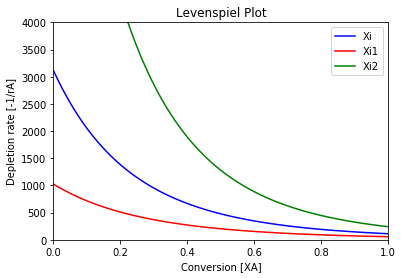

In [260]:
plt.figure(1)
plt.plot(xspan, rate, color='blue', label='Xi')
plt.plot(xspan, rate1, color='red', label='Xi1')
plt.plot(xspan, rate2, color='green', label='Xi2')
plt.legend(loc='best')
plt.axis([0, 1,0,4000])
plt.title('Levenspiel Plot')
plt.ylabel('Depletion rate [-1/rA]') 
plt.xlabel('Conversion [XA]') 
plt.show()

The green is the depletion rate with $T_{0}= 450~K$. As the inlet temperature is increased, one can see on the graph above that the volume below the line reduces, therefore, less volume required from a single reactor to achieve the same conversion.

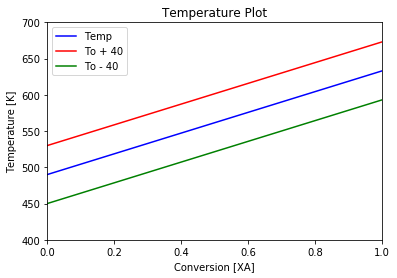

In [254]:
plt.figure(2)
plt.plot(xspan, T3, color='blue', label='Temp')
plt.plot(xspan, Tob + (-delHrx)*xspan/CpA + 40, color='red', label='To + 40')
plt.plot(xspan, Tob + (-delHrx)*xspan/CpA - 40, color='green', label='To - 40')
plt.legend(loc='best')
plt.axis([0, 1,400,700])
plt.title('Temperature Plot')
plt.ylabel('Temperature [K]') 
plt.xlabel('Conversion [XA]') 
plt.show()